<p style="text-align:center"><font size="10" >Kawase Seminar 03-1</font></p>

# スクレイピング入門

# 1.1webクローリングとスクレイピングの概要
さて、いよいよwebスクレイピングを行っていきます! ここでは、まずwebスクレイピングの基礎知識であるクローリングとwebスクレイピングについてみていきます。
その前に、前提知識としてwebについて軽く解説します。
webから情報を取得するにはそもそもwebについて知らないと情報の収集をどのようにするか理解が難しいからです

[![Image from Gyazo](https://i.gyazo.com/4d801c5fb5c9aefed38dd2023bd8f68a.png)](https://gyazo.com/4d801c5fb5c9aefed38dd2023bd8f68a)
引用: Pythonで始めるスクレイピング (Sansan DSOC)

## 1.1.1現在のWebシステムについてざっくり解説

現在のWebシステムはwebクライアントとWebサーバに分かれてサービスを提供しています。

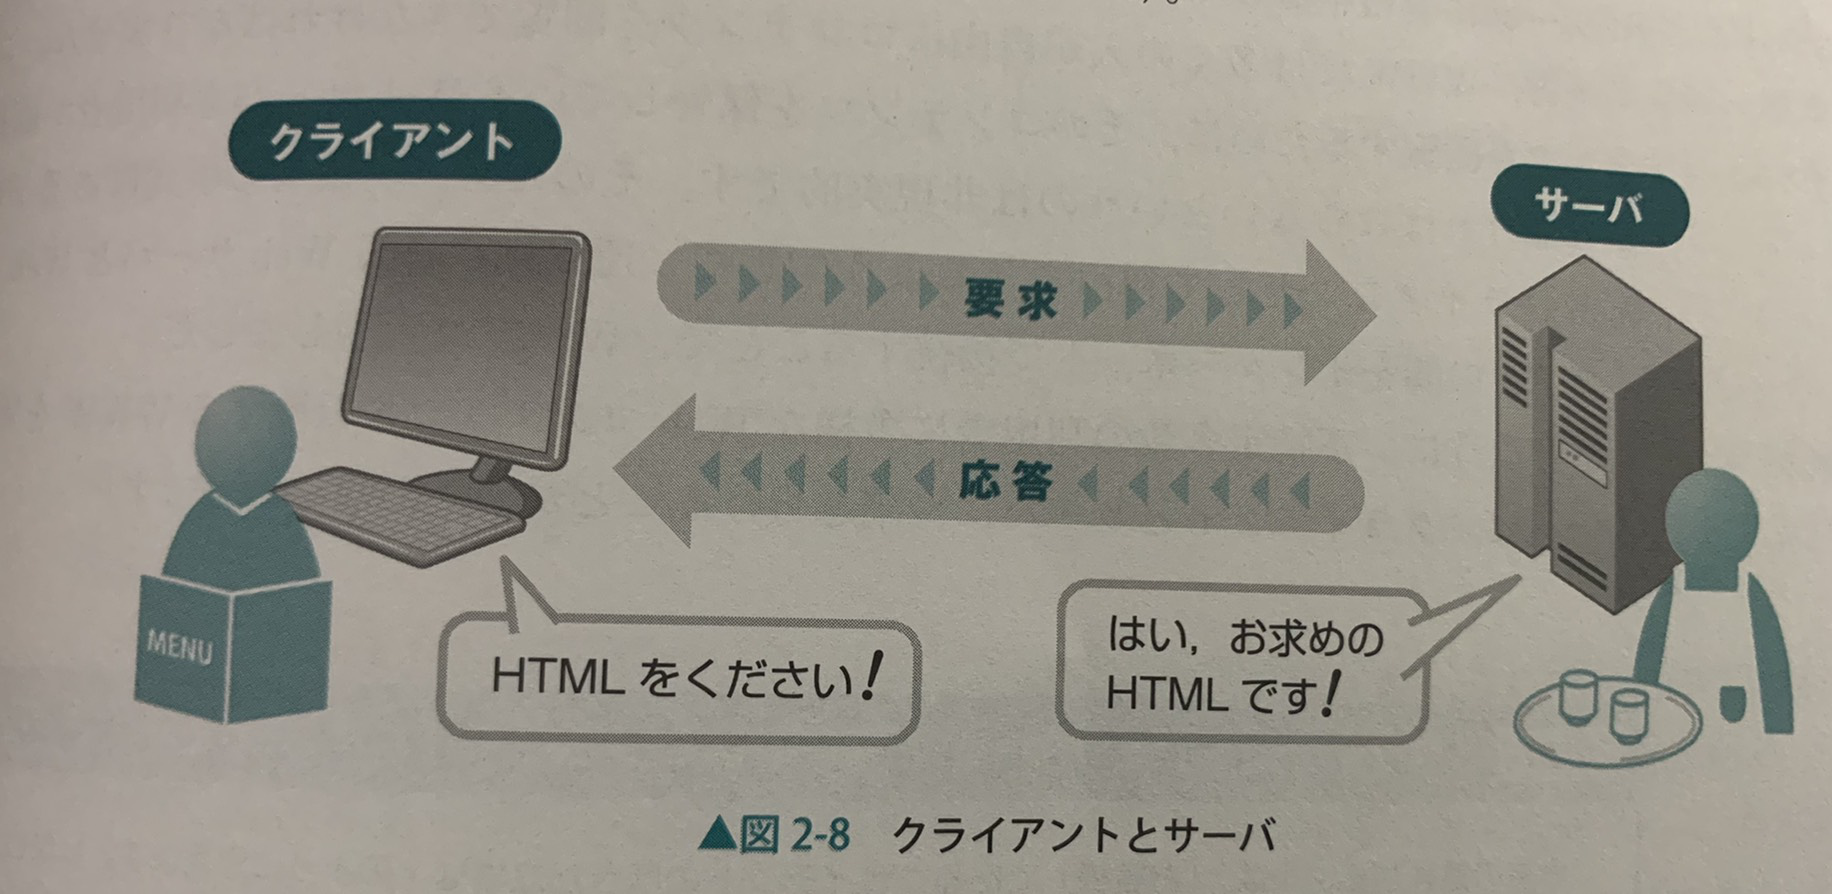
引用: 小森 裕介 「プロになるためのWeb技術入門」 ――なぜ、あなたはWebシステムを開発できないのか


尚、クライアント側からサーバに対する要求を「リクエスト」サーバからクライアントへの応答を「レスポンス」と言います


webシステムはHTML(Hyper Text Markup Language)というネットワーク経由で情報を閲覧するために作られたテキストファイルを使用しています。

#### 【ざっくりHTML解説】
><某>～</某> で一つの**「要素」**と言われる。  
>下の 緑 の部分は**「要素名」**  
>下の 黒 の部分は**「要素値」**  
>下の 青 の部分は**「属性名」**  
>下の 赤 の部分は**「属性値」**  
>基本的に事前情報は `head` タグの内部に  
>サイトの描画情報は `body` タグの内部に置かれる。  
>`html` タグの内部が html 文章であることを示している。  
>`meta` タグは検索エンジン最適化(SEO)のために使われるものです。  
>`link` タグは CSS などの外部データを読み込む際に使われるものです。  
>`title` タグはその名の通り文章のタイトルを示します。  
>`h1`～`h6` タグは見出しを記述します。  
>他に `a` `img` `ul` `ol` `li` `div` `span` `section` `blockquote` `main` `article` `form` `input` `textarea` `select` `option` `button` `script` などなどタグの種類はたくさんあります。  
>属性名にも `class` `content` `href` `name` `id` 等あり、これらを使用してサイトは作られています。

**RESASの例**
~~~html
<!doctype html>
<html lang="ja" class="rn">
    
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article# website: http://ogp.me/ns/website#">
  <meta charset="UTF-8">
	<meta name="viewport" content="width=1280">
  <meta name="description" content="地域経済分析システム（RESAS：リーサス）は、地方自治体の様々な取り組みを情報面から支援するために、まち・ひと・しごと創生本部事務局が提供する、産業構造や人口動態、人の流れなどの官民ビッグデータを集約し、可視化するシステムです。">
  <title>トップページ - RESAS 地域経済分析システム</title>
  <link rel="stylesheet" href="./stylesheets/all.css"/>
  <link rel="shortcut icon" href="./favicon.ico"/>

  <meta property="og:title" content="トップページ - RESAS 地域経済分析システム" />
  <meta property="og:type" content="website" />
  <meta property="og:url" content="https://resas.go.jp/" />
  <meta property="og:image" content="https://resas.go.jp/images/ogp/main.png" />
  <meta property="og:site_name" content="RESAS 地域経済分析システム" />
  <meta property="og:description" content="地域経済分析システム（RESAS：リーサス）は、地方自治体の様々な取り組みを情報面から支援するために、まち・ひと・しごと創生本部事務局が提供する、産業構造や人口動態、人の流れなどの官民ビッグデータを集約し、可視化するシステムです。" />

  <meta name="twitter:card" content="summary_large_image" />
  <meta name="twitter:title" content="トップページ - RESAS 地域経済分析システム" />
  <meta name="twitter:description" content="地域経済分析システム（RESAS：リーサス）は、地方自治体の様々な取り組みを情報面から支援するために、まち・ひと・しごと創生本部事務局が提供する、産業構造や人口動態、人の流れなどの官民ビッグデータを集約し、可視化するシステムです。" />
  <meta name="twitter:image" content="https://resas.go.jp/images/ogp/main.png" />
</head>
    
<body v-on="click: click($event)" class="rn">
<div class="wrap">
  <main class="top">
    <div id="error-wrapper"></div>
    <div id="alert-wrapper"></div>
    <div id="loading-wrapper"></div>
    <div id="terminology-wrapper" class="right-menu__popup"></div>
    <div id="header-wrapper"></div>
    <div id="main-wrapper"></div>
  </main>
</div>

<script src="./javascripts/lib.js"></script>
<script src="./javascripts/index.js"></script>

</body>

</html>
~~~

### URLについて :データのリソースの場所の特定
僕たちクライアントはサーバーからHTMLといったデータを取得します。その際の取得の元があるところがURL(Uniform Resource Locator)です。
日本語で訳すとURLは「リソースの位置を指し示す統一的な記述方法」をといいます。

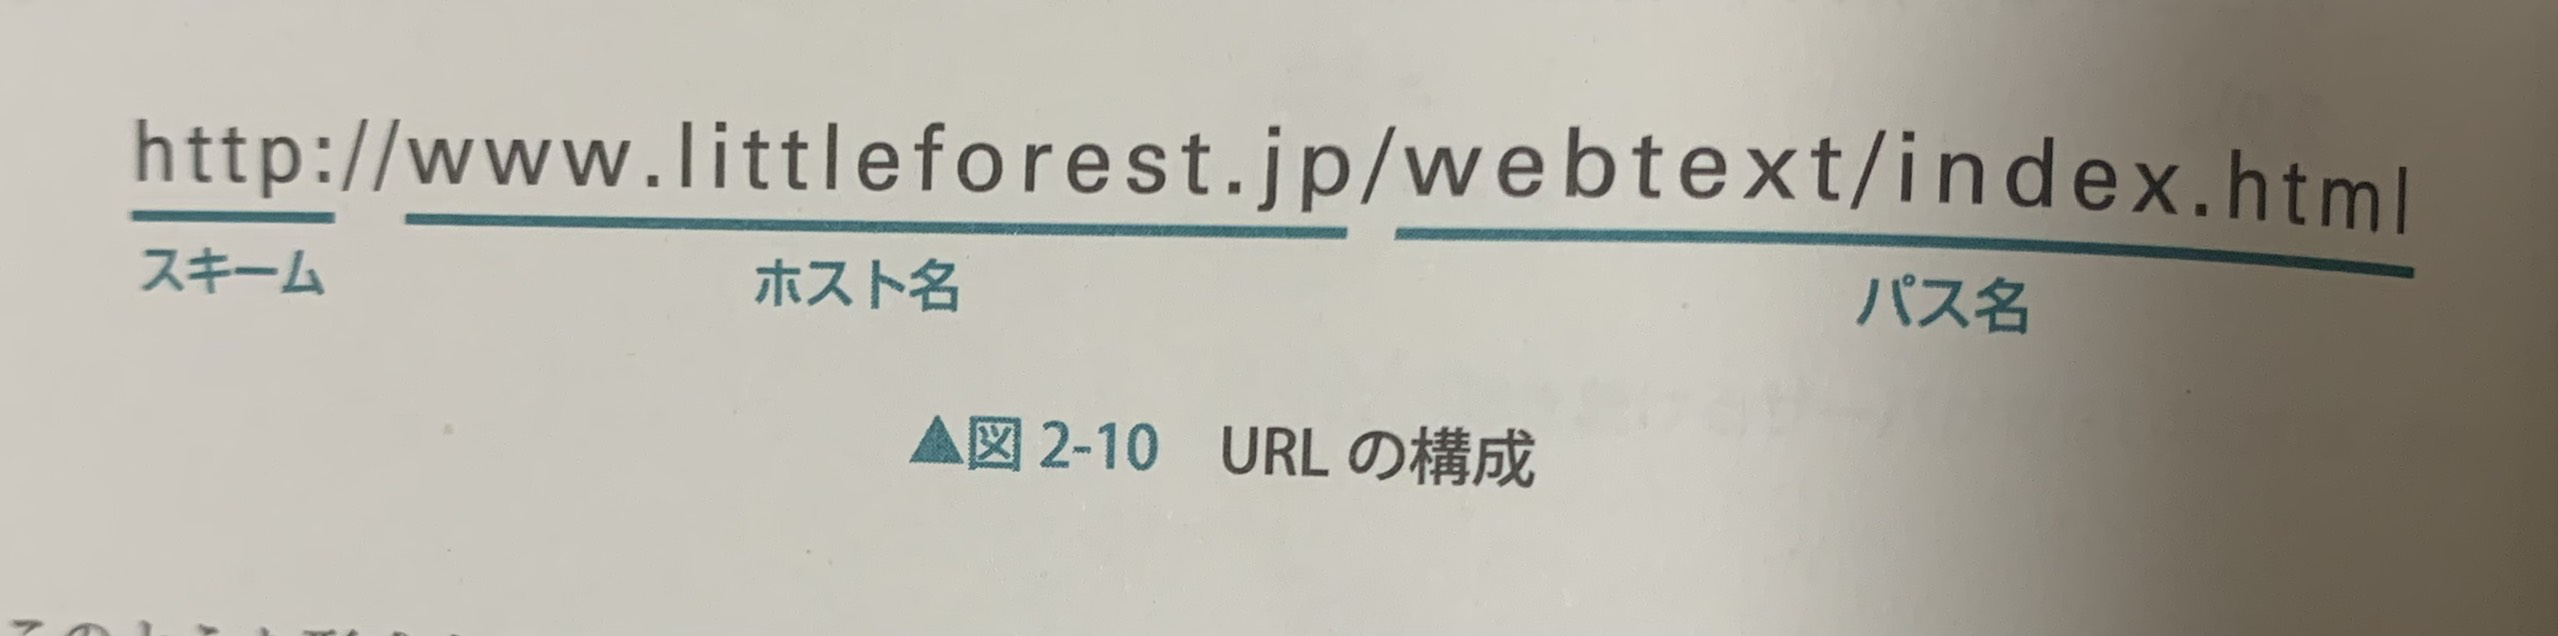
引用: 小森 裕介 「プロになるためのWeb技術入門」 ――なぜ、あなたはWebシステムを開発できないのか


URLにより、僕たちクライアントはサーバーの位置を特定して通信をしデータをやりとりします。

では、その通信をするのはなんでしょうか。答えはHTTPです。

### HTTPとは

そもそもHTTPとは通信をするための取り決めのことです。

例えば、昔の時代に流行った狼煙をイメージしましょう。
狼煙は、敵がいた際に仲間に煙をあげることで警告を知らせるものです。この時、
- 狼煙は敵がいることの合図である
- 敵がいたら狼煙をあげて仲間に知らせる

という意思疎通のルールがあることで成り立っています。

HTTPはまさにネットワークにおける通信ルールのことを指します。(通信ルールであって技術自体を指さない ->技術実装に関してはportを利用)

### webシステムのまとめ

つまりWebシステムとは、HTTPによってクライアントがリクエストを送り、サーバーがレスポンスを返すことの繰り返しにより成り立っています。

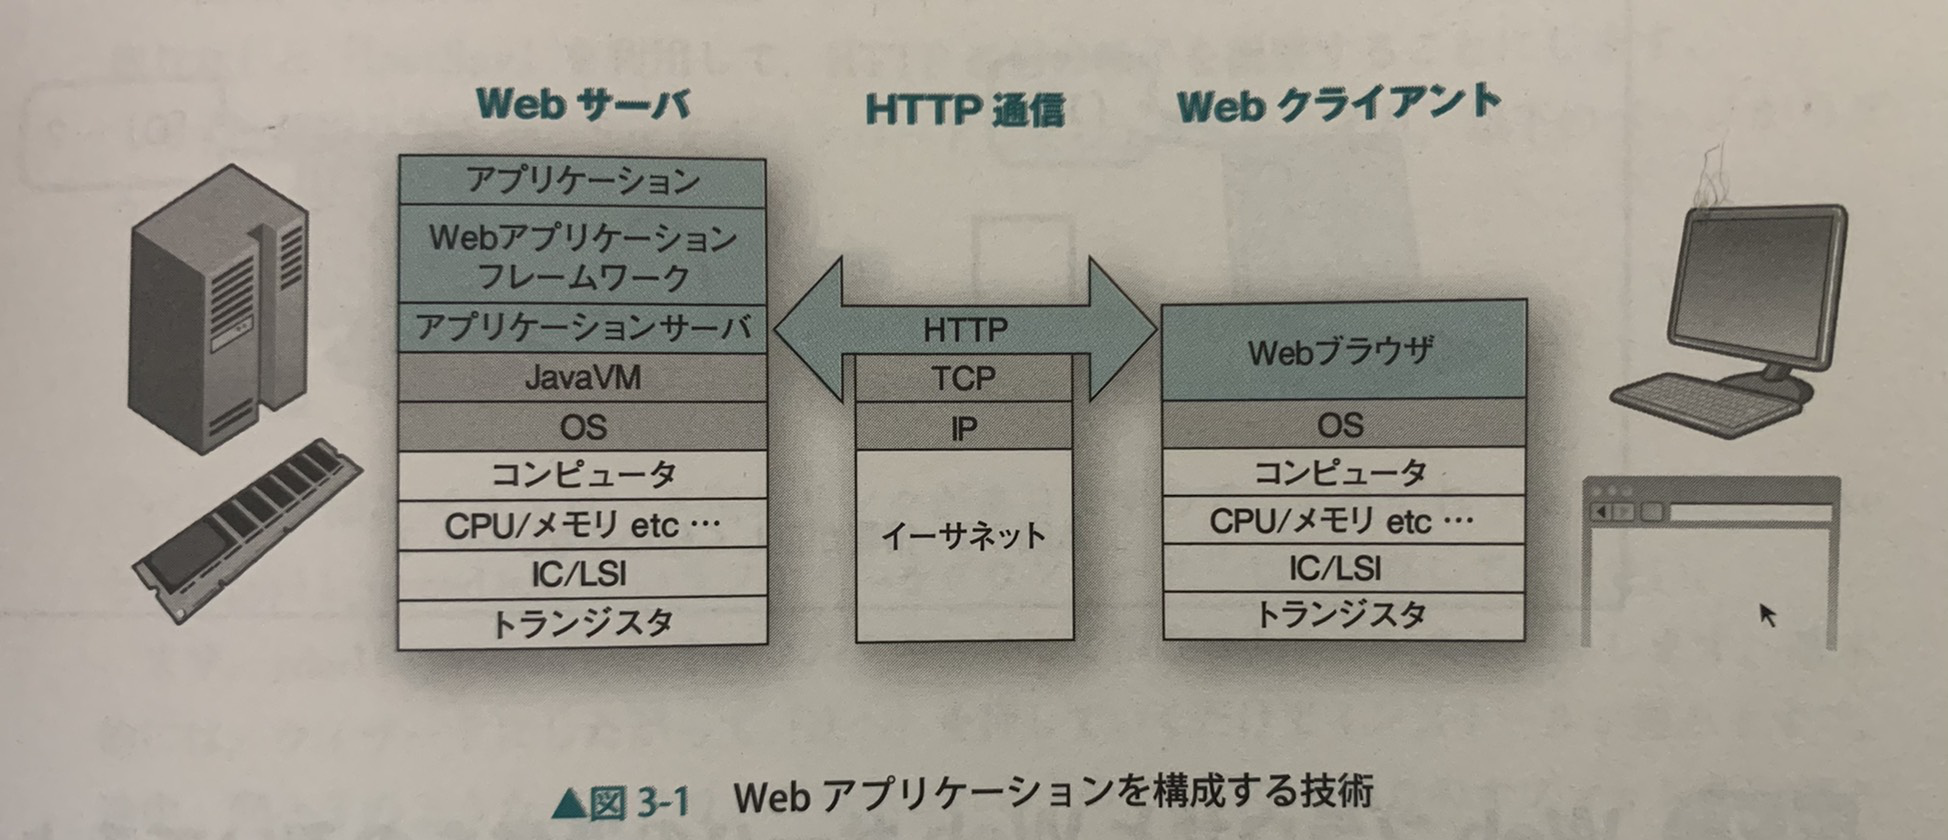

引用: 小森 裕介 「プロになるためのWeb技術入門」 ――なぜ、あなたはWebシステムを開発できないのか

### コラム：HTTPSとは

近年ではHTTP通信だけではセキュリティに問題があるとされており、よりセキュアなHTTPS通信を用いてやりとりしています。

例) https://www.nikkei.com/  , https://densuke.work/  

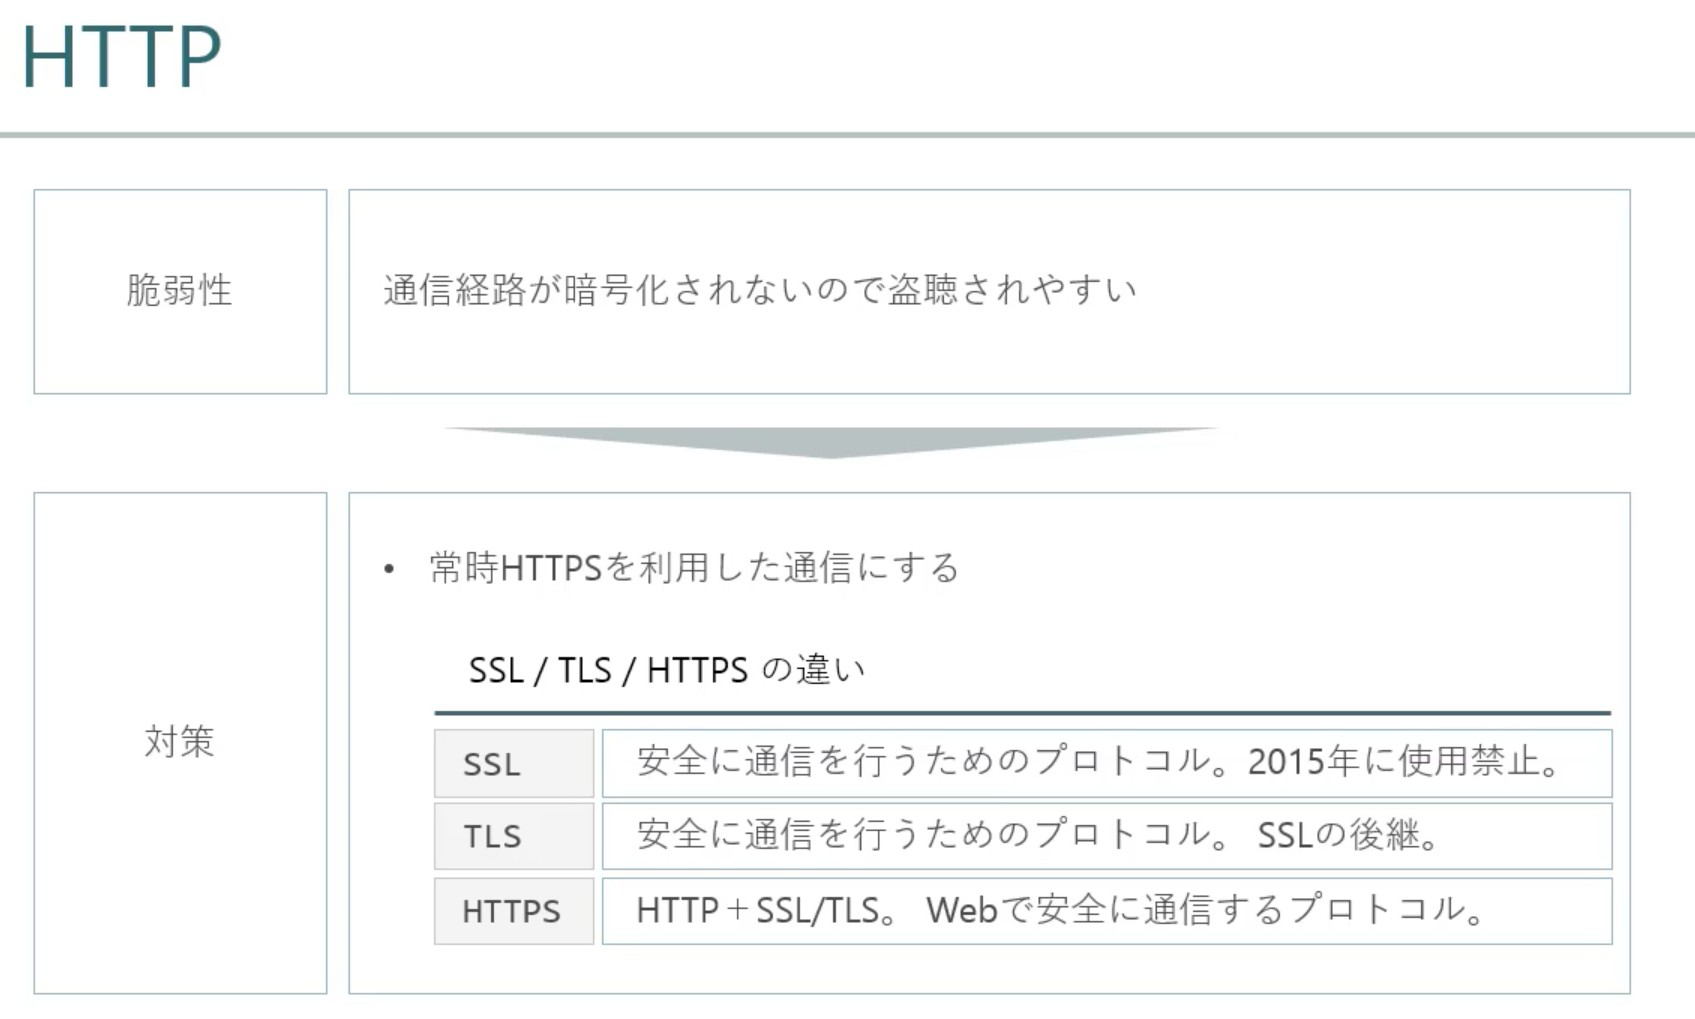
引用: 津郷 晶也  「REST WebAPI サービス 設計」

## 1.1.2クローリングとは
webサイトからHTMLを取得する(クロール)することをクローリングと言います。

### HTMLの取得(クロール)
webページから文字情報を集めるにはクローリングというものが使われます。

HTMLはHTTPライブラリを使用しリクエストを投げることで取得することができます。

In [7]:
#クロールするためにHTTPライブラリ であるrequestsを利用
import requests as req

#getで呼び出している
r = req.get("https://www.nikkei.com/")
# htmlの取得
r.text

### 追加情報: クライアントからサーバーにリクエストを送る４つの方法

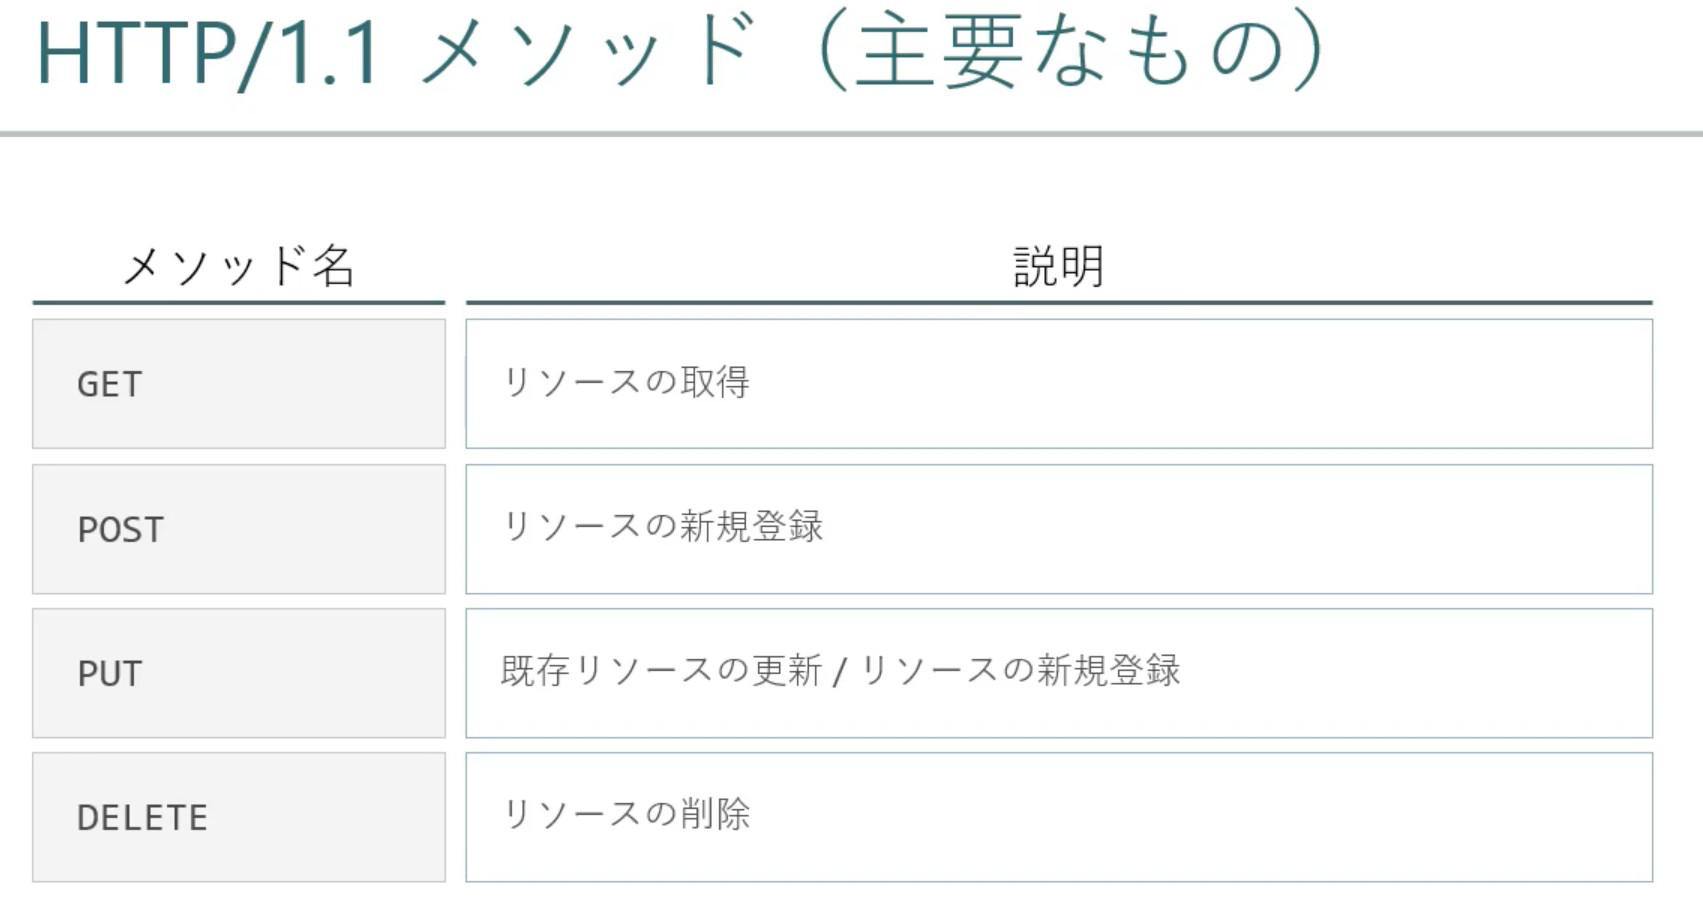

引用: 津郷 晶也  「REST WebAPI サービス 設計」

基本はgetメソッドだけ知っていれば大丈夫です。

### コラム: APIの利用例

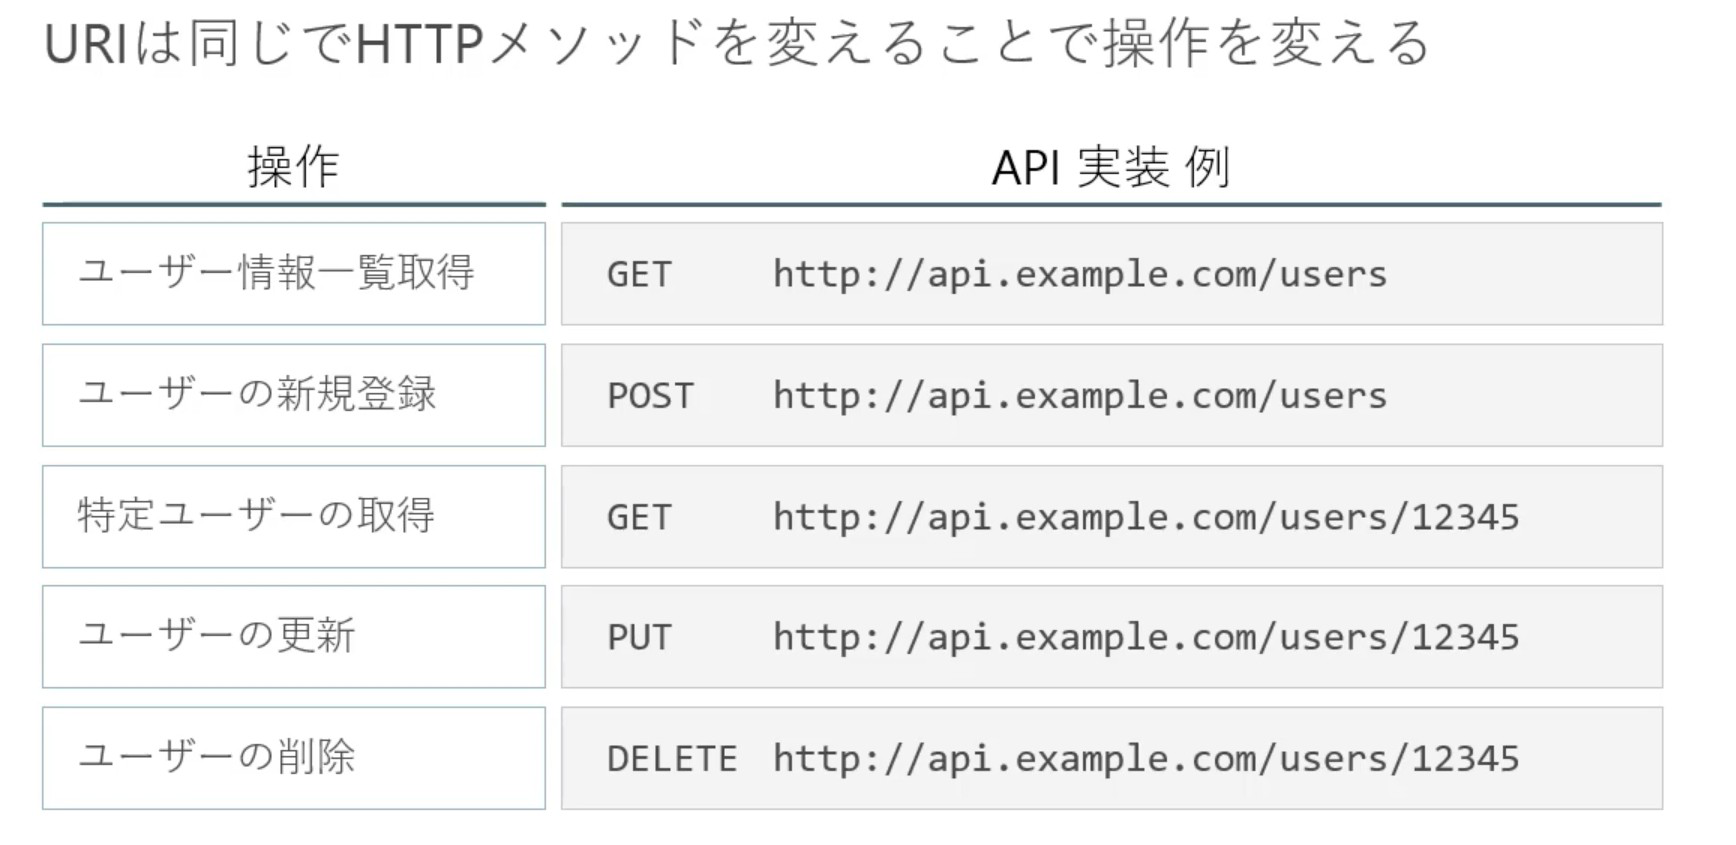

引用: 津郷 晶也  「REST WebAPI サービス 設計」

## 1.1.3スクレイピングとは